# Ordinary Differential Equations

In [1]:
from IPython.display import display
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

## Euler's Method

### First order ODE

Suppose that $y(t)$ is a differentiable function on $[a, b]$ and $\frac{dy}{dt}=f(t, y)$ be a well-posed initial value problem (IVP) such that $y(a)=α$. Solution for this type of IVP can be approximated by Euler's method. Let's $t_i$ be points of equally spaced interval $[a, b]$ such that $t_{i+1}=t_i+h$ for $h=\frac{b-a}{N}$ and $t_0=a, t_N=b$. Then Euler's method formula can be defined as,
$$
y_{i+1} = y_i + hf(t_i, y_i)
$$
Here $i=0, 1, 2, ⋯, N-1$ and $y_0 = y(t_0=a) =α$ (Refer AM2013 course notes for more details).

In [2]:
def euler_method(f, y0, t0, h, num_steps):
  """
  Function for the Euler method.
  f: The derivative function such that dy/dt = f(t, y).
  y0: The initial value of y at t0, y(t0) = y0
  t0: The lower bound of interval [a, b], t0=a
  h: The step size
  num_steps: The number of steps to take.
  """
  y_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y_vals[0] = y0
  t_vals[0] = t0

  for i in range(num_steps):
    y_vals[i+1] = y_vals[i] + h*f(t_vals[i], y_vals[i])
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y_vals

Let define IVP as $\frac{dy}{dt}=f(t, y)=py - qy^2$ for $[a, b]=[0, 4]$ and $y(t_0=a=0)=2000$. Here, $p=0.1, q=0.001$. First let's solve this analytically.

In [3]:
t, p, q = smp.symbols('t p q', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t), p*y - q*y**2)
display(ode)
init_cond = smp.Eq(y.subs(t, 0), 2000)
display(init_cond)
solution = smp.dsolve(ode.subs({p:0.1, q:0.001}), y, ics={init_cond.lhs: init_cond.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), t), p*y(t) - q*y(t)**2)

Eq(y(0), 2000)

Eq(y(t), (100.0*exp(0.1*t) + 6.75015598972095e-15)/(exp(0.1*t) - 0.95))

Now solve this using Euler's method

In [4]:
numeric_func = lambda t, y: 0.1*y - 0.001*y**2
analytic_func = smp.lambdify(t, solution.rhs)

In [5]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions
h = 0.1                     # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = euler_method(numeric_func, y0, t0, h, num_steps)

In [6]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

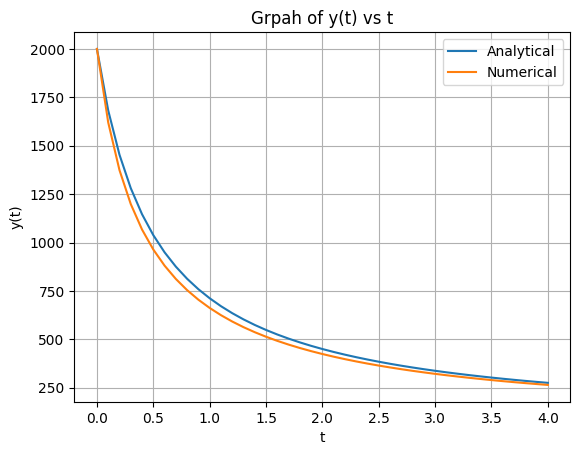

In [7]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

The accuracy of the approximated solution can be evaluated using Mean Squared Error (MSE).
$$
MSE = \frac{∑_{i=0}^N \left( y_i - y(t_i) \right)^2}{N}
$$

In [8]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 1572.088188708765


Let's plot the MSE with respect to number of step size

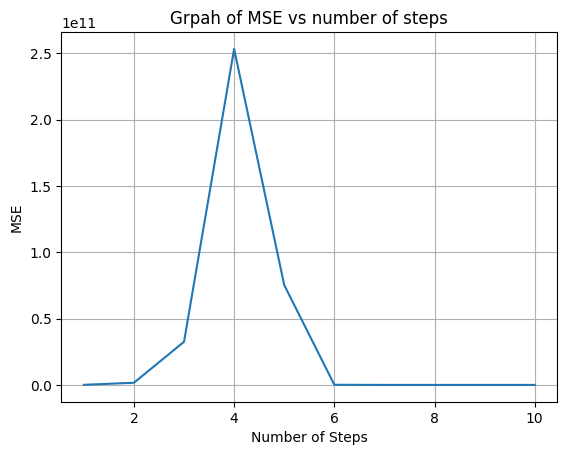

In [ ]:
# For 1<=num_steps<=10
num_steps_arr = np.arange(1, 11)
mse_arr = np.zeros_like(num_steps_arr).astype(float)

a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions

for i, num_steps in enumerate(num_steps_arr):
  h = (b-a)/num_steps
  t_arr, y_numerical = euler_method(numeric_func, y0, t0, h, num_steps)
  y_analytical = analytic_func(t_arr)
  mse_arr[i] = np.mean((y_numerical-y_analytical)**2)

plt.figure()
plt.plot(num_steps_arr, mse_arr)
plt.xlabel("Number of Steps")
plt.ylabel("MSE")
plt.title("Grpah of MSE vs number of steps")
plt.grid()
plt.show()

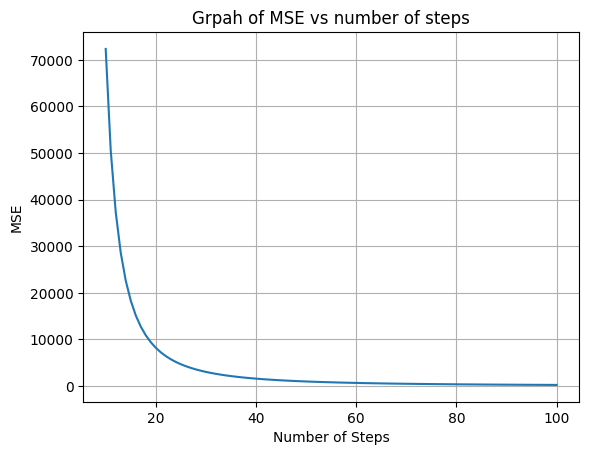

In [ ]:
# For 10<=num_steps<=200
num_steps_arr = np.arange(10, 101)
mse_arr = np.zeros_like(num_steps_arr).astype(float)

a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions

for i, num_steps in enumerate(num_steps_arr):
  h = (b-a)/num_steps
  t_arr, y_numerical = euler_method(numeric_func, y0, t0, h, num_steps)
  y_analytical = analytic_func(t_arr)
  mse_arr[i] = np.mean((y_numerical-y_analytical)**2)

plt.figure()
plt.plot(num_steps_arr, mse_arr)
plt.xlabel("Number of Steps")
plt.ylabel("MSE")
plt.title("Grpah of MSE vs number of steps")
plt.grid()
plt.show()

By above graphs, whenever the number of step size increases (step size decreases) the MSE converges to zero. Therefore accuracy of approximation increases.

### Second order ODE

Suppose $\frac{d^2y}{dt^2}=\ddot{y}=f(t, y, \dot{y})$. This can be reformulate as a system of two first order ODEs. Let's set $y_1=y$.
$$
\dot{y_1} = y_2\\
\dot{y_2} = \ddot{y_1} = f(t, y_1, y_2)
$$
This system of first order ODE can be solved by Euler's method.

In [ ]:
def euler_method_2nd_order_ode(f, y10, y20, t0, h, num_steps):
  """
  Function to solve 2nd order ODE by Euler's method
  f: Second order ODE functions dy2/dt = f(t, y1, y2)
  t0, y10, y20: Initial conditions
  h: Step size
  num_steps: The number of steps to take
  """
  y1_vals = np.zeros(num_steps + 1)
  y2_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y1_vals[0] = y10
  y2_vals[0] = y20
  t_vals[0] = t0

  for i in range(num_steps):
    y1_vals[i+1] = y1_vals[i] + h*y2_vals[i]
    y2_vals[i+1] = y2_vals[i] + h*f(t_vals[i], y1_vals[i], y2_vals[i])
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y1_vals

Let define a second order ODE as $\frac{d^2y}{dt^2} = -4\frac{dy}{dt} -3y$ for $y=0$ and $\frac{dy}{dt}=1$ whenever $t=0$. First let's solve this analytically.

In [ ]:
t = smp.symbols('t', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t, 2), -4*smp.diff(y, t) - 3*y)
display(ode)
init_cond1 = smp.Eq(y.subs(t, 0), 0)
display(init_cond1)
init_cond2 = smp.Eq(y.diff().subs(t, 0), 1)
display(init_cond2)
solution = smp.dsolve(ode, y, ics={init_cond1.lhs: init_cond1.rhs, init_cond2.lhs: init_cond2.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), (t, 2)), -3*y(t) - 4*Derivative(y(t), t))

Eq(y(0), 0)

Eq(Subs(Derivative(y(t), t), t, 0), 1)

Eq(y(t), (exp(2*t) - 1)*exp(-3*t)/2)

Now solve this using Euler's method. Let's $y_1=y$.
$$
\frac{dy_1}{dt}=y_2\\
\frac{dy_2}{dt}=-4y_2-3y_1
$$

In [ ]:
numeric_func = lambda t, y1, y2: -4*y2 - 3*y1
analytic_func = smp.lambdify(t, solution.rhs)

In [ ]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y10, y20 = a, 0, 1      # inittial conditions
h = 0.05                    # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = euler_method_2nd_order_ode(numeric_func, y10, y20, t0, h, num_steps)

In [ ]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

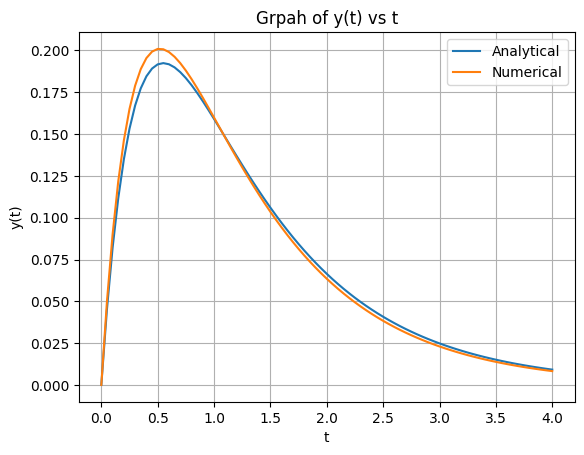

In [ ]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 1.8951675179130475e-05


Let's plot the MSE with respect to number of step size

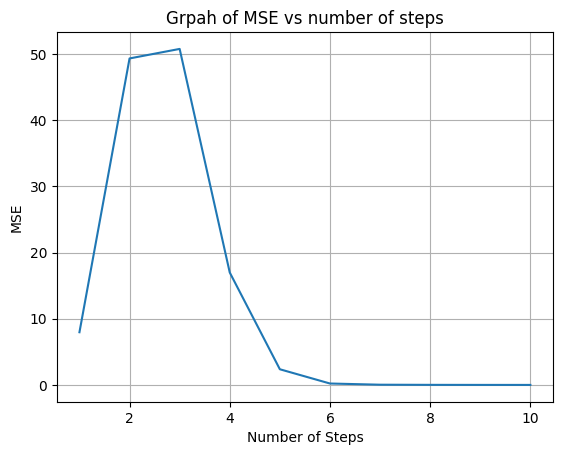

In [ ]:
# For 1<=num_steps<=10
num_steps_arr = np.arange(1, 11)
mse_arr = np.zeros_like(num_steps_arr).astype(float)

a, b = 0, 4                 # lower and upper bound of interval
t0, y10, y20 = a, 0, 1      # inittial conditions

for i, num_steps in enumerate(num_steps_arr):
  h = (b-a)/num_steps
  t_arr, y_numerical = euler_method_2nd_order_ode(numeric_func, y10, y20, t0, h, num_steps)
  y_analytical = analytic_func(t_arr)
  mse_arr[i] = np.mean((y_numerical-y_analytical)**2)

plt.figure()
plt.plot(num_steps_arr, mse_arr)
plt.xlabel("Number of Steps")
plt.ylabel("MSE")
plt.title("Grpah of MSE vs number of steps")
plt.grid()
plt.show()

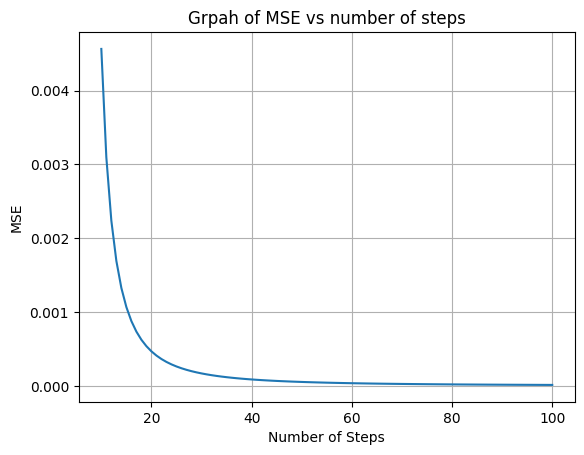

In [ ]:
# For 10<=num_steps<=100
num_steps_arr = np.arange(10, 101)
mse_arr = np.zeros_like(num_steps_arr).astype(float)

a, b = 0, 4                 # lower and upper bound of interval
t0, y10, y20 = a, 0, 1      # inittial conditions

for i, num_steps in enumerate(num_steps_arr):
  h = (b-a)/num_steps
  t_arr, y_numerical = euler_method_2nd_order_ode(numeric_func, y10, y20, t0, h, num_steps)
  y_analytical = analytic_func(t_arr)
  mse_arr[i] = np.mean((y_numerical-y_analytical)**2)

plt.figure()
plt.plot(num_steps_arr, mse_arr)
plt.xlabel("Number of Steps")
plt.ylabel("MSE")
plt.title("Grpah of MSE vs number of steps")
plt.grid()
plt.show()

By above graphs, whenever the number of step size increases (step size decreases) the MSE converges to zero. Therefore accuracy of approximation increases.

## Second Order Runge-Kutta Method

### First order ODE

Let's $t_i$ be points of equally spaced interval $[a, b]$ such that $t_{i+1}=t_i+h$ for $h=\frac{b-a}{N}$ and $t_0=a, t_N=b$. Then second order Runge-Kutta method formula can be defined as,
$$
y_{i+1} = y_i + \frac{1}{2}(k_1+k_2)\text{ where,} \\
k_1=hf(t_i, y_i)\\
k_2=hf(t_i+h, y_i+k_1)
$$
Here $i=0, 1, 2, ⋯, N-1$ and $y_0 = y(t_0=a) =α$ (Refer AM2013 course notes for more details).

In [2]:
def runge_kutta_second_order(f, y0, t0, h, num_steps):
  """
  Function for the Second order Runge-Kutta method.
  f: The derivative function such that dy/dt = f(t, y).
  y0: The initial value of y at t0, y(t0) = y0
  t0: The lower bound of interval [a, b], t0=a
  h: The step size
  num_steps: The number of steps to take.
  """
  y_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y_vals[0] = y0
  t_vals[0] = t0

  for i in range(num_steps):
    k1 = h*f(t_vals[i], y_vals[i])
    k2 = h*f(t_vals[i] + h, y_vals[i] + k1)
    y_vals[i+1] = y_vals[i] + (1/2)*(k1 + k2)
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y_vals

Let define IVP as $\frac{dy}{dt}=f(t, y)=py - qy^2$ for $[a, b]=[0, 4]$ and $y(t_0=a=0)=2000$. Here, $p=0.1, q=0.001$. First let's solve this analytically.

In [3]:
t, p, q = smp.symbols('t p q', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t), p*y - q*y**2)
display(ode)
init_cond = smp.Eq(y.subs(t, 0), 2000)
display(init_cond)
solution = smp.dsolve(ode.subs({p:0.1, q:0.001}), y, ics={init_cond.lhs: init_cond.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), t), p*y(t) - q*y(t)**2)

Eq(y(0), 2000)

Eq(y(t), (100.0*exp(0.1*t) + 6.75015598972095e-15)/(exp(0.1*t) - 0.95))

Now solve this using Second order Runge-Kutta method

In [4]:
numeric_func = lambda t, y: 0.1*y - 0.001*y**2
analytic_func = smp.lambdify(t, solution.rhs)

In [5]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions
h = 0.1                     # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = runge_kutta_second_order(numeric_func, y0, t0, h, num_steps)

In [6]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

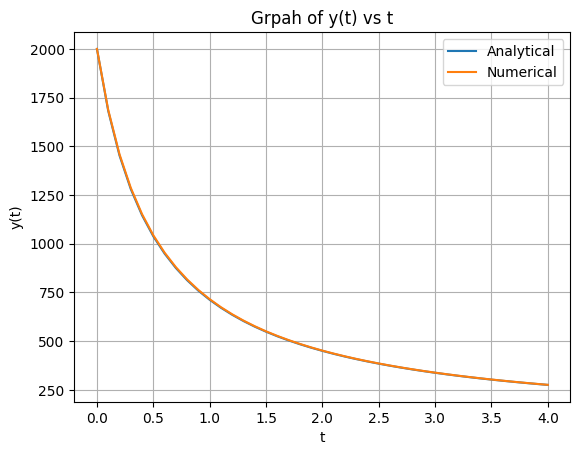

In [7]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [8]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 7.282697980528507


### Second order ODE

Second order Runge-Kutta method also can be used to approximate the solution of second order ODE. Let define a second order ODE as $\frac{d^2y}{dt^2} = -4\frac{dy}{dt} -3y$ for $y=0$ and $\frac{dy}{dt}=1$ whenever $t=0$.

In [ ]:
def runge_kutta_second_order_2nd_order_ode(f, y10, y20, t0, h, num_steps):
  """
  Function to solve 2nd order ODE by second order Runge-Kutta method
  f: Second order ODE functions dy2/dt = f(t, y1, y2)
  t0, y10, y20: Initial conditions
  h: Step size
  num_steps: The number of steps to take
  """
  y1_vals = np.zeros(num_steps + 1)
  y2_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y1_vals[0] = y10
  y2_vals[0] = y20
  t_vals[0] = t0

  for i in range(num_steps):
    k1 = h*y2_vals[i]
    l1 = h*f(t_vals[i], y1_vals[i], y2_vals[i])
    k2 = h*(y2_vals[i]+l1)
    l2 = h*f(t_vals[i] + h, y1_vals[i] + k1, y2_vals[i] + l1)
    y1_vals[i+1] = y1_vals[i] + (1/2)*(k1 + k2)
    y2_vals[i+1] = y2_vals[i] + (1/2)*(l1 + l2)
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y1_vals

First let's solve this analytically.

In [ ]:
t = smp.symbols('t', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t, 2), -4*smp.diff(y, t) - 3*y)
display(ode)
init_cond1 = smp.Eq(y.subs(t, 0), 0)
display(init_cond1)
init_cond2 = smp.Eq(y.diff().subs(t, 0), 1)
display(init_cond2)
solution = smp.dsolve(ode, y, ics={init_cond1.lhs: init_cond1.rhs, init_cond2.lhs: init_cond2.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), (t, 2)), -3*y(t) - 4*Derivative(y(t), t))

Eq(y(0), 0)

Eq(Subs(Derivative(y(t), t), t, 0), 1)

Eq(y(t), (exp(2*t) - 1)*exp(-3*t)/2)

In [ ]:
numeric_func = lambda t, y1, y2: -4*y2 - 3*y1
analytic_func = smp.lambdify(t, solution.rhs)

In [ ]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y10, y20 = a, 0, 1      # inittial conditions
h = 0.05                     # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = runge_kutta_second_order_2nd_order_ode(numeric_func, y10, y20, t0, h, num_steps)

In [ ]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

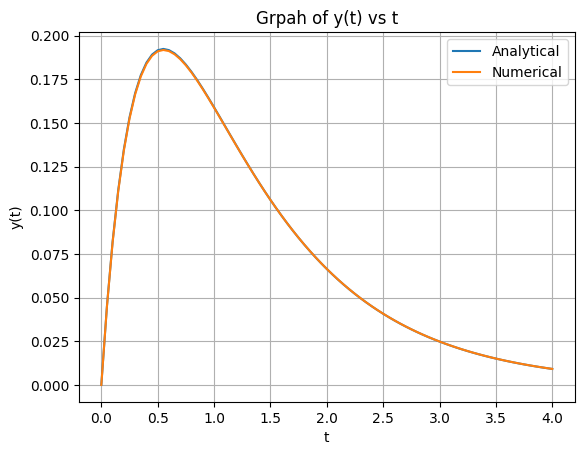

In [ ]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 7.291438484054763e-08


## Fourth Order Runge-Kutta Method

### First order ODE

Let's $t_i$ be points of equally spaced interval $[a, b]$ such that $t_{i+1}=t_i+h$ for $h=\frac{b-a}{N}$ and $t_0=a, t_N=b$. Then forth order Runge-Kutta method formula can be defined as,
$$
y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\text{ where,} \\
k_1=hf(t_i, y_i)\\
k_2=hf\left( t_i+\frac{h}{2}, y_i+\frac{k_1}{2} \right)\\
k_3=hf\left( t_i+\frac{h}{2}, y_i+\frac{k_2}{2} \right)\\
k_4=hf\left( t_i+h, y_i+k_3 \right)
$$
Here $i=0, 1, 2, ⋯, N-1$ and $y_0 = y(t_0=a) =α$ (Refer AM2013 course notes for more details).

In [2]:
def runge_kutta_forth_order(f, y0, t0, h, num_steps):
  """
  Function for the Forth order Runge-Kutta method.
  f: The derivative function such that dy/dt = f(t, y).
  y0: The initial value of y at t0, y(t0) = y0
  t0: The lower bound of interval [a, b], t0=a
  h: The step size
  num_steps: The number of steps to take.
  """
  y_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y_vals[0] = y0
  t_vals[0] = t0

  for i in range(num_steps):
    k1 = h*f(t_vals[i], y_vals[i])
    k2 = h*f(t_vals[i] + h/2, y_vals[i] + k1/2)
    k3 = h*f(t_vals[i] + h/2, y_vals[i] + k2/2)
    k4 = h*f(t_vals[i] + h, y_vals[i] + k3)
    y_vals[i+1] = y_vals[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y_vals

Let define IVP as $\frac{dy}{dt}=f(t, y)=py - qy^2$ for $[a, b]=[0, 4]$ and $y(t_0=a=0)=2000$. Here, $p=0.1, q=0.001$. First let's solve this analytically.

In [3]:
t, p, q = smp.symbols('t p q', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t), p*y - q*y**2)
display(ode)
init_cond = smp.Eq(y.subs(t, 0), 2000)
display(init_cond)
solution = smp.dsolve(ode.subs({p:0.1, q:0.001}), y, ics={init_cond.lhs: init_cond.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), t), p*y(t) - q*y(t)**2)

Eq(y(0), 2000)

Eq(y(t), (100.0*exp(0.1*t) + 6.75015598972095e-15)/(exp(0.1*t) - 0.95))

Now solve this using Forth order Runge-Kutta method

In [4]:
numeric_func = lambda t, y: 0.1*y - 0.001*y**2
analytic_func = smp.lambdify(t, solution.rhs)

In [5]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions
h = 0.1                     # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = runge_kutta_forth_order(numeric_func, y0, t0, h, num_steps)
print(t_arr.shape)

(41,)


In [6]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

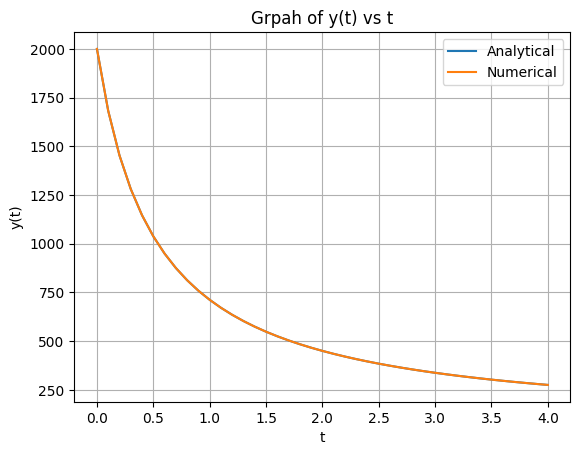

In [7]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [8]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 1.735378327759266e-05


### Second order ODE

Forth order Runge-Kutta method also can be used to approximate the solution of second order ODE. Let define a second order ODE as $\frac{d^2y}{dt^2} = -4\frac{dy}{dt} -3y$ for $y=0$ and $\frac{dy}{dt}=1$ whenever $t=0$.

In [ ]:
def runge_kutta_forth_order_2nd_order_ode(f, y10, y20, t0, h, num_steps):
  """
  Function to solve 2nd order ODE by forth order Runge-Kutta method
  f: Second order ODE functions dy2/dt = f(t, y1, y2)
  t0, y10, y20: Initial conditions
  h: Step size
  num_steps: The number of steps to take
  """
  y1_vals = np.zeros(num_steps + 1)
  y2_vals = np.zeros(num_steps + 1)
  t_vals = np.zeros(num_steps + 1)
  y1_vals[0] = y10
  y2_vals[0] = y20
  t_vals[0] = t0

  for i in range(num_steps):
    k1 = h*y2_vals[i]
    l1 = h*f(t_vals[i], y1_vals[i], y2_vals[i])
    k2 = h*(y2_vals[i] + l1/2)
    l2 = h*f(t_vals[i] + h/2, y1_vals[i] + k1/2, y2_vals[i] + l1/2)
    k3 = h*(y2_vals[i] + l2/2)
    l3 = h*f(t_vals[i] + h/2, y1_vals[i] + k2/2, y2_vals[i] + l2/2)
    k4 = h*(y2_vals[i] + l3)
    l4 = h*f(t_vals[i] + h, y1_vals[i] + k3, y2_vals[i] + l3)
    y1_vals[i+1] = y1_vals[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    y2_vals[i+1] = y2_vals[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
    t_vals[i+1] = t_vals[i] + h
  return t_vals, y1_vals

First let's solve this analytically.

In [ ]:
t = smp.symbols('t', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t, 2), -4*smp.diff(y, t) - 3*y)
display(ode)
init_cond1 = smp.Eq(y.subs(t, 0), 0)
display(init_cond1)
init_cond2 = smp.Eq(y.diff().subs(t, 0), 1)
display(init_cond2)
solution = smp.dsolve(ode, y, ics={init_cond1.lhs: init_cond1.rhs, init_cond2.lhs: init_cond2.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), (t, 2)), -3*y(t) - 4*Derivative(y(t), t))

Eq(y(0), 0)

Eq(Subs(Derivative(y(t), t), t, 0), 1)

Eq(y(t), (exp(2*t) - 1)*exp(-3*t)/2)

In [ ]:
numeric_func = lambda t, y1, y2: -4*y2 - 3*y1
analytic_func = smp.lambdify(t, solution.rhs)

In [ ]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y10, y20 = a, 0, 1      # inittial conditions
h = 0.05                    # step size
num_steps = int((b-a)/h)    # number of steps

t_arr, y_numerical = runge_kutta_forth_order_2nd_order_ode(numeric_func, y10, y20, t0, h, num_steps)

In [ ]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

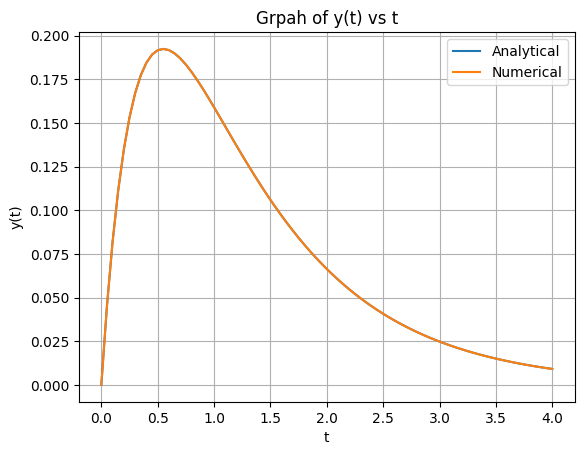

In [ ]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_numerical-y_analytical)**2)}")

MSE = 1.146447678155154e-13


## Python ODE Solvers

Let define IVP as $\frac{dy}{dt}=f(t, y)=py - qy^2$ for $[a, b]=[0, 4]$ and $y(t_0=a=0)=2000$. Here, $p=0.1, q=0.001$. First let's solve this analytically.

In [2]:
t, p, q = smp.symbols('t p q', real=True)
y = smp.Function('y', real=True)(t)
ode = smp.Eq(smp.diff(y, t), p*y - q*y**2)
display(ode)
init_cond = smp.Eq(y.subs(t, 0), 2000)
display(init_cond)
solution = smp.dsolve(ode.subs({p:0.1, q:0.001}), y, ics={init_cond.lhs: init_cond.rhs}).simplify()
display(solution)

Eq(Derivative(y(t), t), p*y(t) - q*y(t)**2)

Eq(y(0), 2000)

Eq(y(t), (100.0*exp(0.1*t) + 6.75015598972095e-15)/(exp(0.1*t) - 0.95))

Now solve this using Python ODE solver (solve_ivp)

In [8]:
numeric_func = lambda t, y: 0.1*y - 0.001*y**2
analytic_func = smp.lambdify(t, solution.rhs)

In [9]:
# obtain the numerical solution
a, b = 0, 4                 # lower and upper bound of interval
t0, y0 = a, 2000            # inittial conditions
h = 0.1                     # step size
t_arr = np.arange(a, b+(h/2), h)

sol = solve_ivp(numeric_func, [a, b], [y0], dense_output=True)   # numerical solution by python solver
y_numerical = sol.sol(t_arr).reshape(len(t_arr))

In [10]:
# obtain the analytical solution
y_analytical = analytic_func(t_arr)

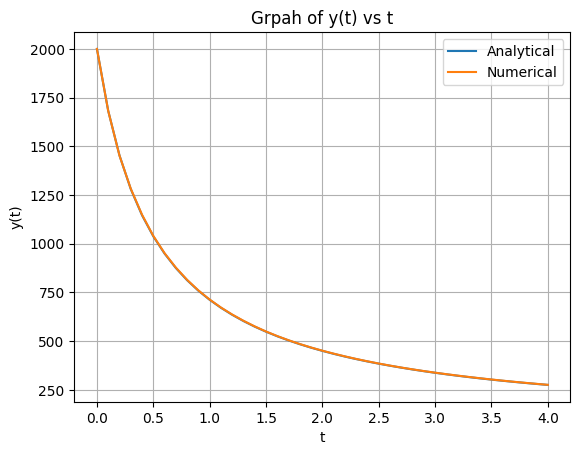

In [11]:
plt.figure()
plt.plot(t_arr, y_analytical, label="Analytical")
plt.plot(t_arr, y_numerical, label="Numerical")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Grpah of y(t) vs t")
plt.legend()
plt.grid()
plt.show()

In [12]:
# MSE of second order Runge-Kutta method for this problem
print(f"MSE = {np.mean((y_analytical-y_numerical)**2)}")

MSE = 1.2381534858794307
